# <span style='background :blue' > Progetto finale: Fashion_data </span>

### <span style='font-family:"font_family name"'> <span style=''> In questo progetto andrò ad analizzare  i dati 2021 di un marketplace di abbigliamento second hand, in cui le persone possono rivendere i loro abiti. L'obiettivo sarà quello di ottenere una panoramica sul comportamento degli utenti.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline
import matplotlib.dates as mdates
sns.set_theme('notebook', style='dark')
sns.set()

In [2]:
df = pd.read_csv('C:\\Users\\Matteo\\Downloads\\Fashion_data Final Project.csv')

In [3]:
df.head()

,user_uuid,category,designer_id,language,level,country,purchase_date,platform,item_id,stars,subscription_date
0,183,belt,120,en,cheap,uk,13-7-2022,android,3521,1,20-8-2021
1,134,underwear,102,it,cheap,it,2-5-2023,android,6239,2,20-11-2022
2,158,belt,106,it,cheap,it,6-8-2021,pc,3618,3,18-3-2020
3,82,shoes,102,it,premium,it,18-7-2023,android,5281,4,21-1-2022
4,201,shoes,113,en,average,uk,7-5-2023,android,5260,1,25-11-2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_uuid          999 non-null    int64 
 1   category           999 non-null    object
 2   designer_id        999 non-null    int64 
 3   language           999 non-null    object
 4   level              999 non-null    object
 5   country            999 non-null    object
 6   purchase_date      999 non-null    object
 7   platform           999 non-null    object
 8   item_id            999 non-null    int64 
 9   stars              999 non-null    int64 
 10  subscription_date  999 non-null    object
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


**user_uuid:**  identificativo dell’utente che vende <br> **category:** categoria di abbigliamento <br> **designer_id:** identificativo del designer  <br> **language:** lingua dell’utente che vende  <br> **level:** fascia di prezzo <br> **country:** nazionalità dell’utente che vende <br> **purchase_date:** la data in cui l’utente ha venduto il prodotto <br> **platform:** piattaforma da cui è stato fatto il pagamento <br> **item_id:** identificativo del prodotto <br> **stars:** stelle medie assegnate al prodotto (da 1 a 5) <br> **subscription_date:** giorno in cui l’utente che vende si è iscritto

In [5]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'],infer_datetime_format=True)
df['subscription_date'] = pd.to_datetime(df['subscription_date'],infer_datetime_format=True)

In [6]:
df_subscription=df.loc[df['subscription_date'].dt.year==2021].sort_values(by='subscription_date')

In [7]:
sub_2021= df_subscription[['country','subscription_date']].groupby(['subscription_date']).size()

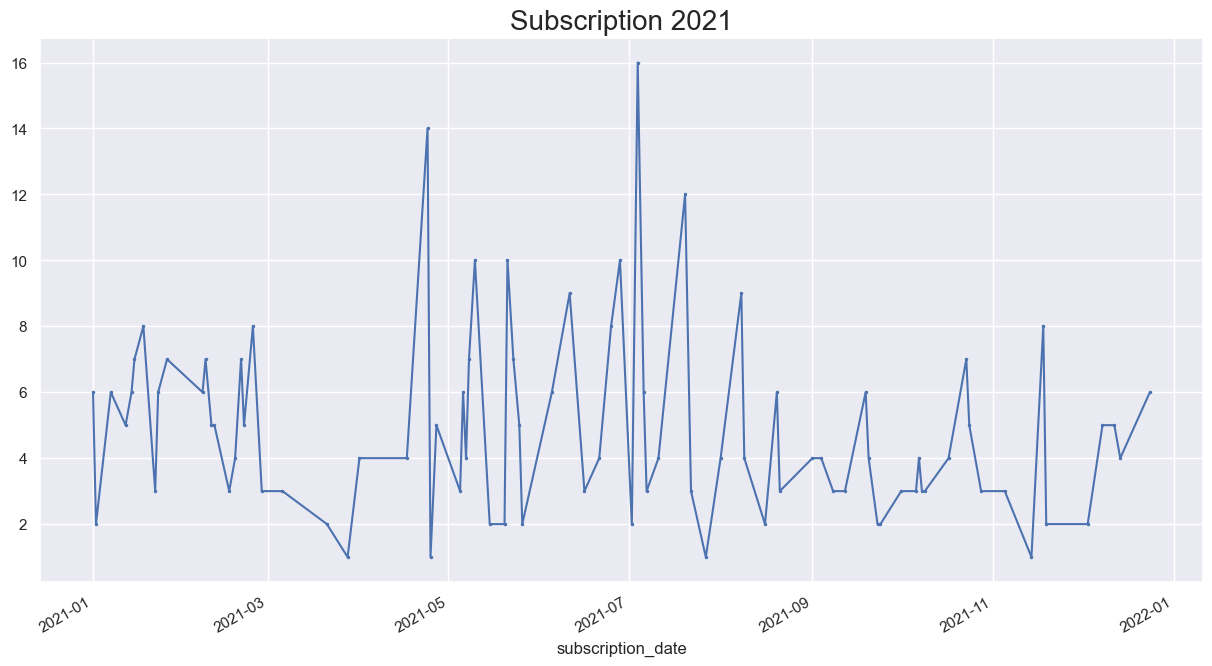

In [8]:
sub_2021.plot(figsize=(15, 8),
                    marker='.',
                    markersize=3,
                    linestyle='-')
plt.title('Subscription 2021',fontsize=20)
plt.show()

### Vediamo l'andamento delle sottoscrizioni del 2021, i picchi più alti li troviamo nei mesi centrali dell'anno

In [9]:
df_2021=df.loc[df['purchase_date'].dt.year==2021]
df_2021=df_2021.set_index('purchase_date').sort_index()

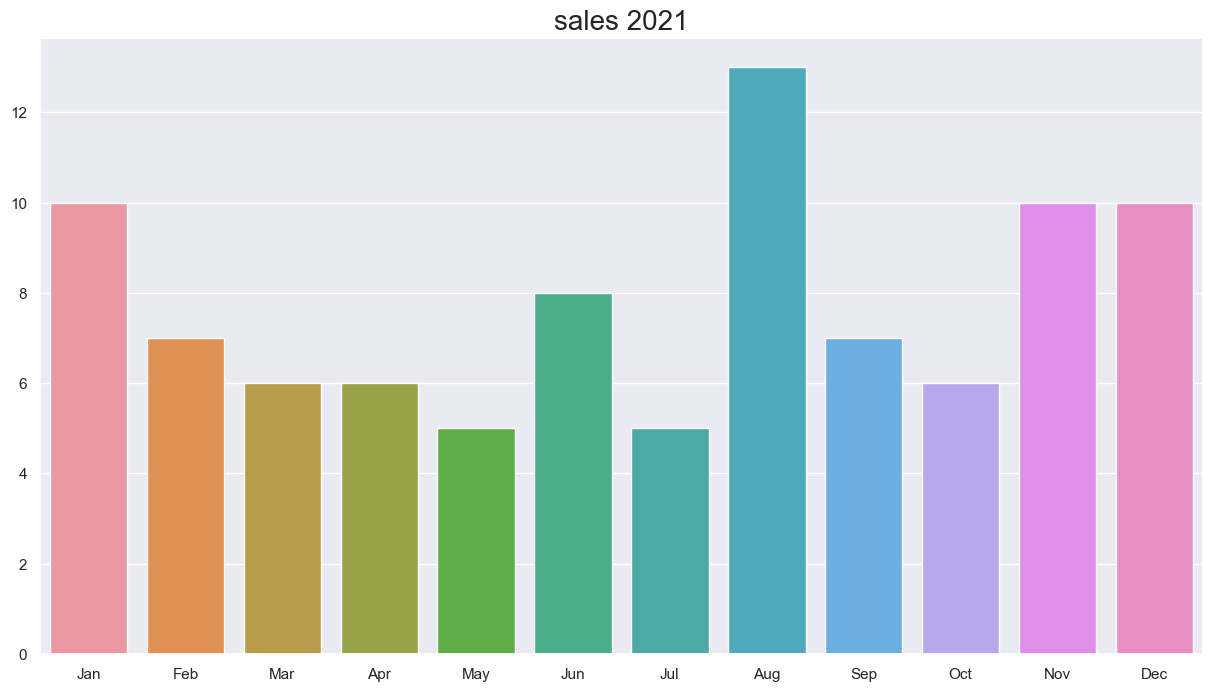

In [10]:
plt.figure(figsize=(15,8))
month_purchase=(df_2021.index.month.value_counts()).sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(data=df_2021,x=months,y=month_purchase.values)
plt.title('sales 2021',fontsize=20)
plt.show()

### Questa è la quantità degli oggetti venduti nel 2021 divisi per ogni mese, agosto risulta essere quello maggiore

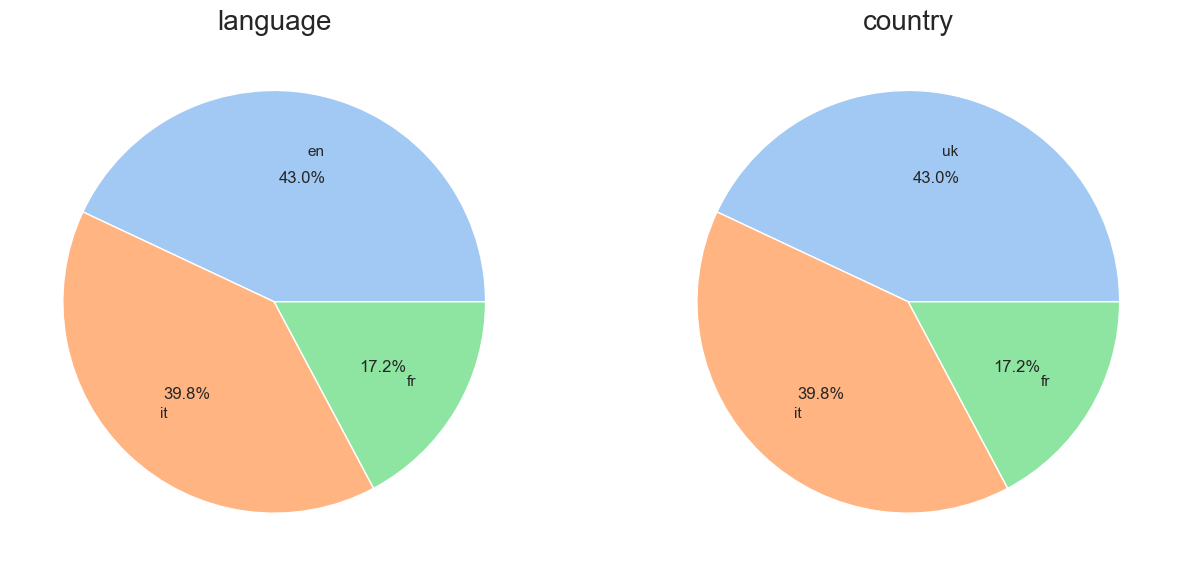

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 12))
language= df_2021['language'].value_counts()
country=df_2021['country'].value_counts()
labels1=language.index
labels2=country.index
colors=sns.color_palette("pastel")
ax1.pie(language,labels=labels1,colors=colors,autopct='%.1f%%',labeldistance=0.73)
ax2.pie(country,labels=labels2,colors=colors,autopct='%.1f%%',labeldistance=0.73)
ax1.set_title('language',fontsize=20)
ax2.set_title('country',fontsize=20)
plt.show()

### Gli utenti del Regno Unito (43%) sono quelli che hanno venduto più oggetti nel 2021, seguiti da quelli dell'Italia (39,8%) e per ultimi quelli della Francia (17,2%)

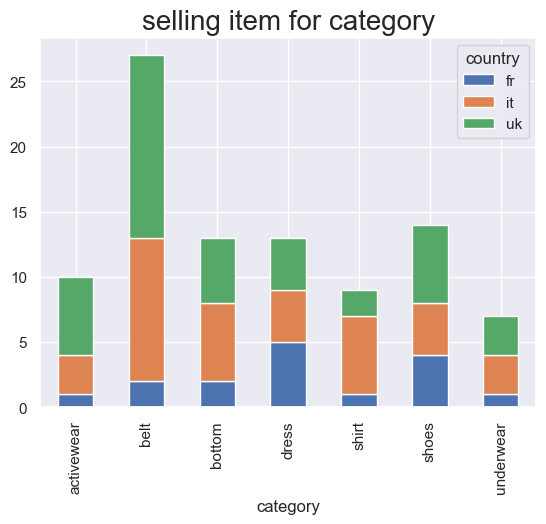

In [12]:
category=df_2021.groupby(['category','country'])['country'].count().unstack('country')
category.plot(kind='bar',stacked=True)
plt.title('selling item for category',fontsize=20)
plt.show()

### La categoria belt (cinture) è sicuramente quella con più vendite in totale, però se si fa riferimento agli utenti francesi la preferita risulta essere quella relativa a dress (vestiti)

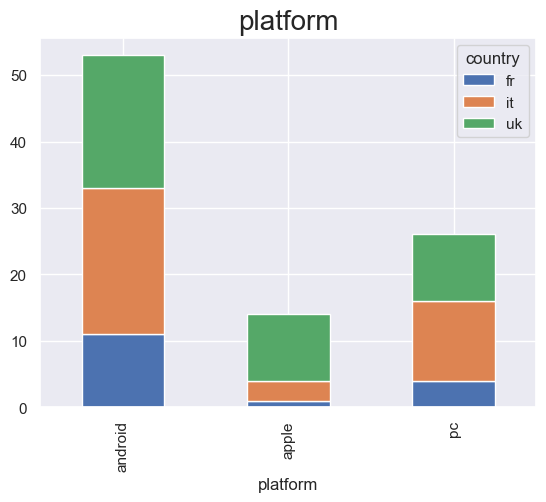

In [13]:
platform=df_2021.groupby(['platform','country'])['country'].count().unstack('country')
platform.plot(kind='bar',stacked=True)
plt.title('platform',fontsize=20)
plt.show()

### La piattaforma per il pagamento più usata è android per chi acquista dagli utenti di tutte e 3 le nazionalità, seguono pc e poi apple

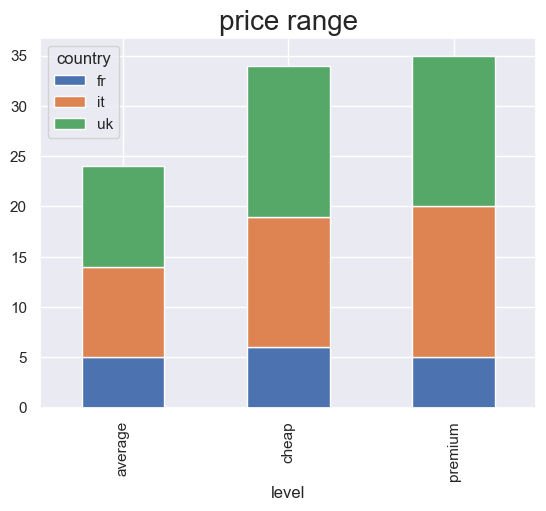

In [14]:
level=df_2021.groupby(['level','country'])['country'].count().unstack('country')
level.plot(kind='bar',stacked=True)
plt.title('price range',fontsize=20)
plt.show()

### La fascia di prezzo più utlizzata è quella premium, in particolare per chi acquista dagli utenti italiani, per chi lo fa da quelli francesi risulta essere leggermente maggiore la fascia cheap

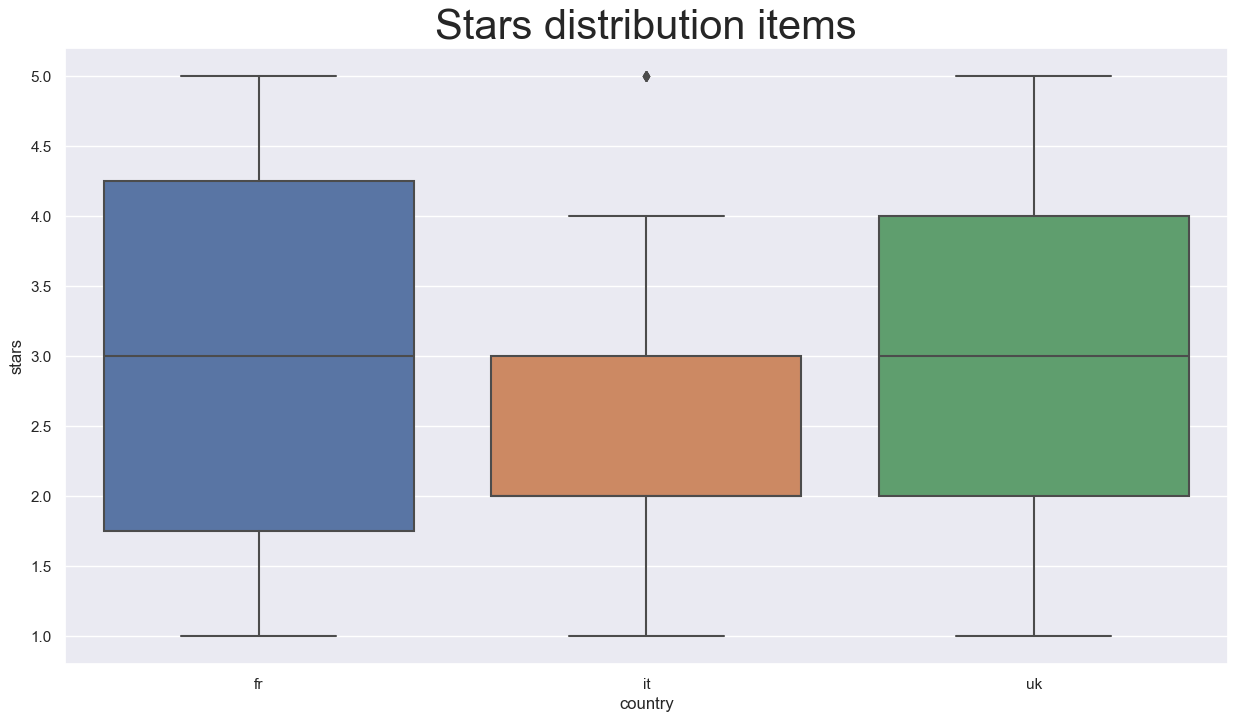

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_2021,x='country',y='stars',order=['fr','it','uk'])
plt.title('Stars distribution items',fontsize=30)
plt.show()

### In questo grafico vediamo la distribuzione delle stelle assegnate ai prodotti . Quelli degli utenti inglesi e francesi presentano generalmente una valutazione più alta rispetto a quelli degli italiani

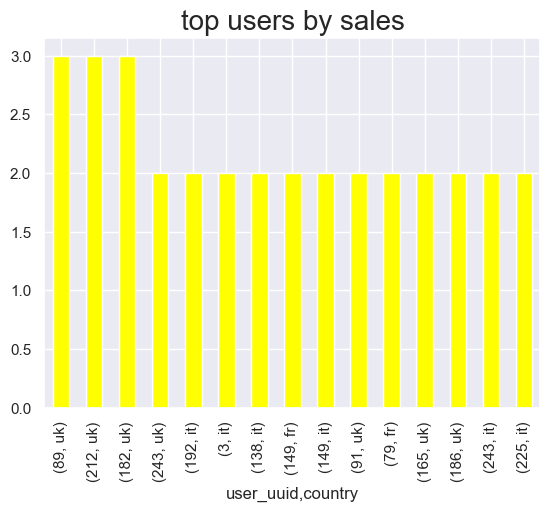

In [16]:
user=df_2021.groupby(['user_uuid','country'])['user_uuid'].agg('count').sort_values(ascending=False)[:15]
user.plot(kind='bar',color='yellow')
plt.title('top users by sales',fontsize=20)
plt.show()

### Vediamo gli utenti con più oggetti venduti, identificati anche dalla nazionalità. Ai primi posti ci sono 3 utenti della Gran Bretagna

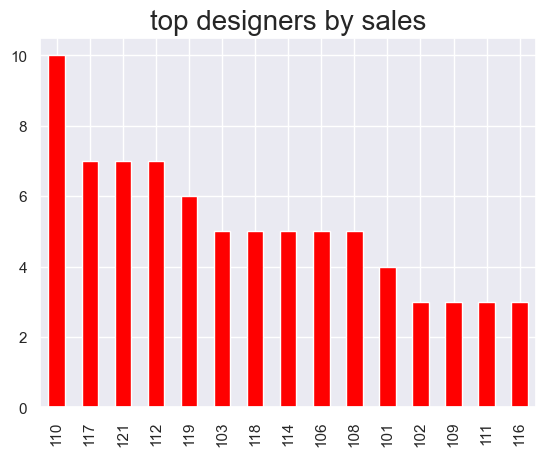

In [17]:
designer=df_2021.designer_id.value_counts()[:15]
designer.plot(kind='bar',color='red')
plt.title('top designers by sales',fontsize=20)
plt.show()

### Vediamo quali sono i designer (tramite il loro id) i cui oggetti risultano più venduti

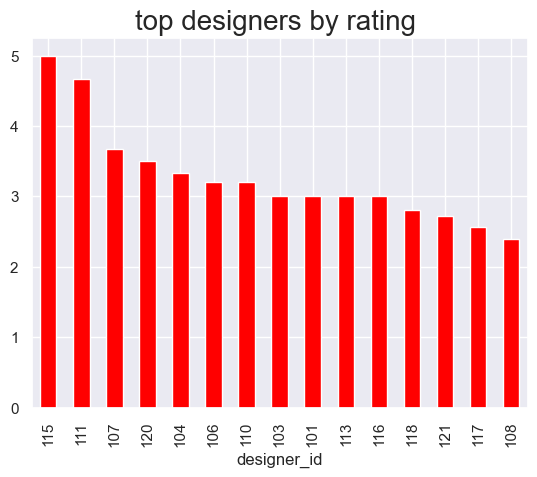

In [18]:
user=df_2021.groupby('designer_id')['stars'].agg('mean').sort_values(ascending=False)[:15]
user.plot(kind='bar',color='red')
plt.title('top designers by rating ',fontsize=20)
plt.show()

### In questo caso vediamo i designer che hanno una valutazione media più alta dei lori prodotti

# <span style='background :blue' > Conclusione </span>

### Abbiamo visto una panoramica generale degli utenti che vendono in questo marketplace, ci siamo concentrati sui dati relativi al 2021 e abbiamo dato maggiore rilevanza alle differenze tra le loro nazionalità